In [1]:
import os
import re
import tensorflow as tf
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as plt

## Make Predictions

In [2]:
model_path = "mining_detection_model.h5"
model = tf.keras.models.load_model(model_path)

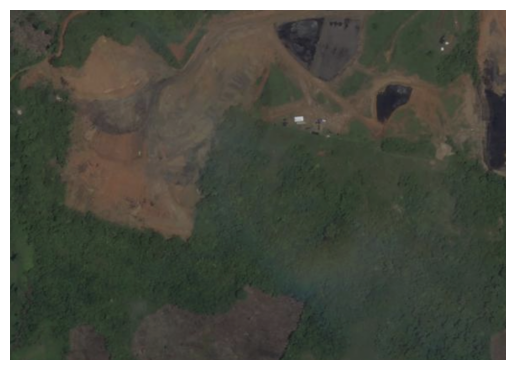

In [3]:
img_path = 'images/test/image11_1.png'
#img_path = 'images/dataset/No Mining/Forest_122.jpg'
original_img = tf.keras.preprocessing.image.load_img(img_path)
plt.imshow(original_img)
plt.axis('off')
plt.show()

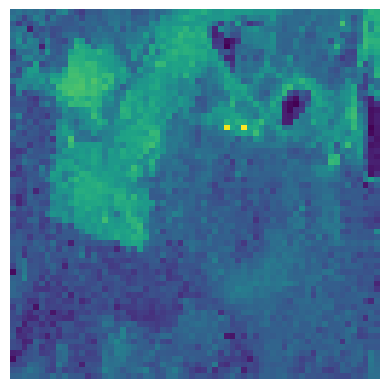

In [4]:
# gray_img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64), color_mode='grayscale')
# OR
gray_img = tf.image.rgb_to_grayscale(original_img)
gray_img = tf.image.resize(gray_img, (64, 64))
plt.imshow(gray_img)
plt.axis('off')
plt.show()

In [5]:
# Convert to array
img_array = tf.keras.preprocessing.image.img_to_array(gray_img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch
img_array.shape

TensorShape([1, 64, 64, 1])

In [6]:
# Make prediction
result = model.predict(img_array, verbose=0)
print(result)

# Get probabilities
probabilities = 1 / (1 + np.exp(-result))
print(probabilities)

# Get prediction label
prediction = np.argmax(result, axis=1)[0]
class_names = ['Mining', 'No Mining']
print(class_names[prediction])
print(f"{probabilities[0][prediction]*100:.2f}%")

[[-4.4933753  4.465968 ]]
[[0.01105916 0.98863703]]
No Mining
98.86%


## Final Results

In [7]:
def get_images_from_folder(folder_path):
    image_files = []
    for root, _, files in os.walk(folder_path):
        for file in natsorted(files):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))
    return image_files

images = get_images_from_folder("images/test")
for image in images:
    print(image)

images/test\image1_0.png
images/test\image2_1.jpg
images/test\image3_1.jpg
images/test\image4_1.jpg
images/test\image5_0.png
images/test\image6_1.jpg
images/test\image7_1.jpg
images/test\image8_1.jpg
images/test\image9_1.jpg
images/test\image10_1.jpg
images/test\image11_1.png
images/test\image12_1.jpg


In [8]:
# Extract label from images
labels = []
for image_path in images:
    result = re.search(r"^.*_(\d+)\.\w+$", image_path)
    if not result:
        raise Exception(f"A label could not be found on image '{image_path}'")
    num_label = int(result.group(1))
    labels.append(int(not num_label))
labels

[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [9]:
def make_prediction(img):
    gray_img = tf.image.rgb_to_grayscale(img)
    gray_img = tf.image.resize(gray_img, (64, 64))
    # Convert to array
    img_array = tf.keras.preprocessing.image.img_to_array(gray_img)
    img_array = tf.expand_dims(img_array, axis=0) # Create a batch
    # Predict
    result = model.predict(img_array, verbose=0)
    prediction = np.argmax(result, axis=1)[0]
    return prediction

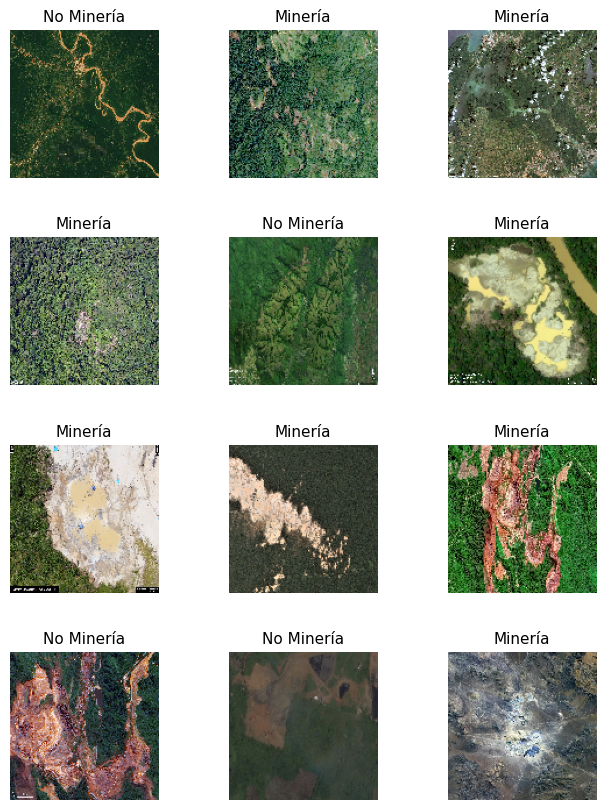

In [10]:
CLASS_NAMES = {
    0: "Minería",
    1: "No Minería",
}

plt.figure(figsize=(8,10))
plt.subplots_adjust(hspace=0.4)
for i, data in enumerate(zip(images, labels)):
    image, label = data
    img = tf.keras.preprocessing.image.load_img(image, target_size=(128, 128))
    predition_label = make_prediction(img)
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(img)
    plt.title(CLASS_NAMES[predition_label], fontdict={"fontsize": 11})
    # plt.title(f"Resultado: {CLASS_NAMES[predition_label]}", fontdict={"fontsize": 10}, loc="left")
    plt.axis("off")
plt.show()